In [1]:
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from keras.layers import Dense

from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


In [2]:
from numpy import genfromtxt
EEG = genfromtxt("C:/Users/SoobinYim/workspace/Confusion during MOOC/EEG_data.csv", delimiter=",")

In [3]:
#6의 raw데이터에 이상이 있으므로 6을 제외하고 분석
EEG=EEG[1:,:]
EEG=pd.DataFrame(EEG)

In [4]:
remove_6=EEG[EEG[0]==6].index
print(EEG.shape, remove_6.shape)

(12811, 15) (1275,)


In [5]:
EEG=EEG.drop(remove_6)
print(EEG.shape)

(11536, 15)


In [6]:
EEG=EEG.values

In [7]:
X=EEG
y = EEG[:, -1]
print(X.shape,y.shape)

(11536, 15) (11536,)


In [8]:
#동영상, raw, 주파수 data 사용
X1=pd.DataFrame(X)
X1=X1.drop(X1.columns[[0,2,3,13,14]], axis='columns')
X1.head()

,1,4,5,6,7,8,9,10,11,12
0,0.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,0.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,0.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0
3,0.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0
4,0.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0


In [9]:
#사람 정보, raw, 주파수 data 사용
X2=pd.DataFrame(X)
X2=X2.drop(X2.columns[[1,2,3,13,14]], axis='columns')
X2.head()

,0,4,5,6,7,8,9,10,11,12
0,0.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,0.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,0.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0
3,0.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0
4,0.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0


In [10]:
#동영상, raw, 주파수 data 사용
X3=pd.DataFrame(X)
X3=X3.drop(X3.columns[[0,2,3,4,13,14]], axis='columns')
X3.head()

,1,5,6,7,8,9,10,11,12
0,0.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,0.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,0.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0
3,0.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0
4,0.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0


In [11]:
#사람 정보, 주파수 data 사용
X4=pd.DataFrame(X)
X4=X4.drop(X4.columns[[1,2,3,4,13,14]], axis='columns')
X4.head()

,0,5,6,7,8,9,10,11,12
0,0.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,0.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,0.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0
3,0.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0
4,0.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0


In [12]:
X1=X1.values
X2=X2.values
X3=X3.values
X4=X4.values

In [13]:
#X=X1
#X=X2
X=X3
#X=X4

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8075, 9) (3461, 9) (8075,) (3461,)


In [17]:
from tensorflow.keras import utils as np_utils
#one-hot encoding
y_train      = np_utils.to_categorical(y_train)
y_test       = np_utils.to_categorical(y_test)

print(y_train.shape, y_test.shape)

(8075, 2) (3461, 2)


In [15]:
from keras.models import Sequential, Model 
from keras.utils import np_utils
from keras.layers import Dense, Dropout
from keras.layers import Input, Reshape, Activation, add, Add
from keras.utils.vis_utils import plot_model

In [18]:
def model_create(eeg_data):
    eeg_input=Input(shape=(9,)) #입력 정의
    
    eeg_output = Dense(50, activation='relu')(eeg_input)
    eeg_output = Dropout(0.5)(eeg_output)
    eeg_output = Dense(150, activation='relu')(eeg_input)
    eeg_output = Dropout(0.5)(eeg_output)
    eeg_output = Dense(150, activation='relu')(eeg_input)
    eeg_output = Dropout(0.5)(eeg_output)
    eeg_output = Dense(200, activation='relu')(eeg_output)
    
    model = Dense(2, activation='sigmoid')(eeg_output)
    
    model = keras.models.Model(inputs=eeg_input, outputs=model) 
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model 

In [19]:
model=model_create(X)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 9)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               1500      
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               30200     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 402       
Total params: 32,102
Trainable params: 32,102
Non-trainable params: 0
_________________________________________________________________


In [20]:
hist=model.fit(X_train, y_train, epochs=150, batch_size=50, validation_data=(X_test,y_test))

Train on 8075 samples, validate on 3461 samples
Epoch 1/150
8075/8075 [==============================] - 1s 121us/step - loss: 7379.9243 - accuracy: 0.5007 - val_loss: 1135.1496 - val_accuracy: 0.4819
Epoch 2/150
8075/8075 [==============================] - 1s 62us/step - loss: 3053.6922 - accuracy: 0.5062 - val_loss: 905.2876 - val_accuracy: 0.5081
Epoch 3/150
8075/8075 [==============================] - 0s 60us/step - loss: 1619.8641 - accuracy: 0.5035 - val_loss: 628.0833 - val_accuracy: 0.4861
Epoch 4/150
8075/8075 [==============================] - 1s 62us/step - loss: 908.0674 - accuracy: 0.5022 - val_loss: 209.6166 - val_accuracy: 0.5160
Epoch 5/150
8075/8075 [==============================] - 1s 64us/step - loss: 437.3505 - accuracy: 0.5136 - val_loss: 119.4692 - val_accuracy: 0.5256
Epoch 6/150
8075/8075 [==============================] - 0s 61us/step - loss: 196.3877 - accuracy: 0.5129 - val_loss: 50.5909 - val_accuracy: 0.5036
Epoch 7/150
8075/8075 [=========================

8075/8075 [==============================] - 0s 62us/step - loss: 0.6917 - accuracy: 0.5186 - val_loss: 0.7593 - val_accuracy: 0.5159
Epoch 57/150
8075/8075 [==============================] - 0s 60us/step - loss: 0.6919 - accuracy: 0.5183 - val_loss: 0.7628 - val_accuracy: 0.5156
Epoch 58/150
8075/8075 [==============================] - 0s 60us/step - loss: 0.6968 - accuracy: 0.5186 - val_loss: 0.7555 - val_accuracy: 0.5153
Epoch 59/150
8075/8075 [==============================] - 0s 61us/step - loss: 0.6962 - accuracy: 0.5185 - val_loss: 0.9862 - val_accuracy: 0.5157
Epoch 60/150
8075/8075 [==============================] - 0s 61us/step - loss: 0.7824 - accuracy: 0.5188 - val_loss: 0.7549 - val_accuracy: 0.5160
Epoch 61/150
8075/8075 [==============================] - 0s 60us/step - loss: 0.7132 - accuracy: 0.5184 - val_loss: 0.7584 - val_accuracy: 0.5163
Epoch 62/150
8075/8075 [==============================] - 0s 61us/step - loss: 0.6909 - accuracy: 0.5181 - val_loss: 0.7566 - val_a

Epoch 112/150
8075/8075 [==============================] - 1s 64us/step - loss: 0.6913 - accuracy: 0.5158 - val_loss: 0.7524 - val_accuracy: 0.5133
Epoch 113/150
8075/8075 [==============================] - 0s 61us/step - loss: 0.7186 - accuracy: 0.5162 - val_loss: 0.7739 - val_accuracy: 0.5133
Epoch 114/150
8075/8075 [==============================] - 0s 61us/step - loss: 0.6940 - accuracy: 0.5158 - val_loss: 0.7191 - val_accuracy: 0.5134
Epoch 115/150
8075/8075 [==============================] - 0s 60us/step - loss: 0.6924 - accuracy: 0.5154 - val_loss: 0.7181 - val_accuracy: 0.5134
Epoch 116/150
8075/8075 [==============================] - 0s 61us/step - loss: 0.6916 - accuracy: 0.5157 - val_loss: 0.7181 - val_accuracy: 0.5134
Epoch 117/150
8075/8075 [==============================] - 0s 61us/step - loss: 0.6915 - accuracy: 0.5157 - val_loss: 0.7168 - val_accuracy: 0.5136
Epoch 118/150
8075/8075 [==============================] - 1s 69us/step - loss: 0.6915 - accuracy: 0.5159 - val_

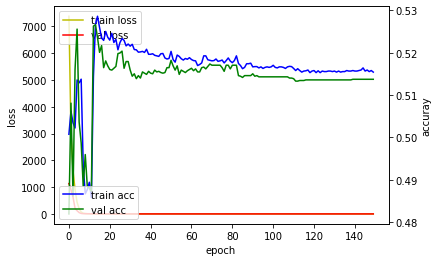

In [21]:
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [22]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

3461/3461 [==============================] - 0s 44us/step
Test accuracy:  0.5137243866920471
